In [2]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const
import scipy.fft as fft

In [3]:
with open('Data/Aufg_6.2.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T

data = f.channel_to_pos(data,cal)

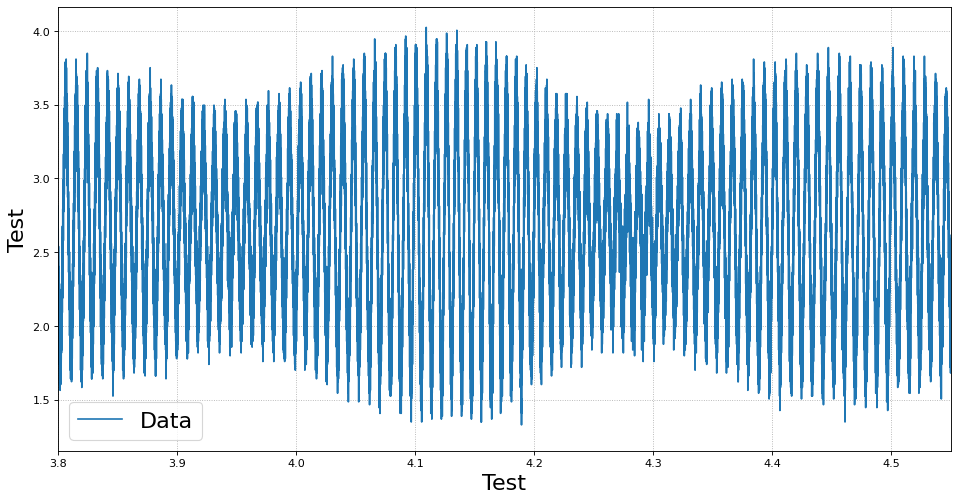

In [4]:
f.figsize(2)
plt.errorbar(data[0],data[1],label = 'Data')

f.form([3.8,4.55])

Wavelength: -3.479697331567566e-06 m


/tmp/ipykernel_27855/937175805.py:20: RuntimeWarning: divide by zero encountered in divide
  freqs = 1/freqs


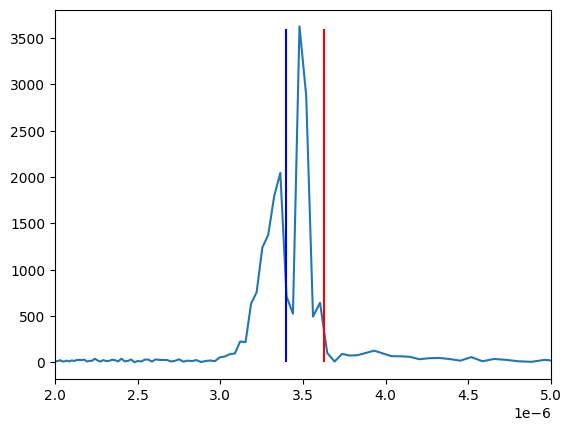

In [15]:
freq_scale = 2/5.127868608985219*1e-3

intensity = data[1]
position  = data[0]*freq_scale


intensity -= np.mean(intensity)


freqs = np.fft.fftfreq(len(intensity), d=((np.mean(np.diff(position)))))
fft_int = np.fft.fft(intensity)


peak_idx = np.argmax(np.abs(fft_int))
peak_freq = freqs[peak_idx]


print(f"Wavelength: {1/peak_freq} m")

freqs = 1/freqs

plt.plot(freqs, np.abs(fft_int))
plt.xlim(0.2e-5,0.5e-5)
plt.vlines(3.6271e-06,0,3600,colors="r")
plt.vlines(3.4007e-06,0,3600,colors="b")

In [9]:
dat = [freqs, np.abs(fft_int)]

sorted_indices = sorted(range(len(dat[0])), key=lambda k: dat[0][k])

dat_sorted = [[dat[0][i], dat[1][i]] for i in sorted_indices]

dat_sorted = np.array(dat_sorted).T

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 91
    # variables        = 3
    chi-square         = 9798778.20
    reduced chi-square = 111349.752
    Akaike info crit   = 1060.40870
    Bayesian info crit = 1067.94128
    R-squared          = 0.68059209
[[Variables]]
    amplitude:  6.9925e-04 +/- 5.7110e-05 (8.17%) (init = 0.0008505856)
    center:     3.4234e-06 +/- 1.3443e-08 (0.39%) (init = 3.454521e-06)
    sigma:      1.4235e-07 +/- 1.3459e-08 (9.46%) (init = 7.822575e-08)
    fwhm:       3.3520e-07 +/- 3.1694e-08 (9.46%) == '2.3548200*sigma'
    height:     1959.71409 +/- 160.454761 (8.19%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


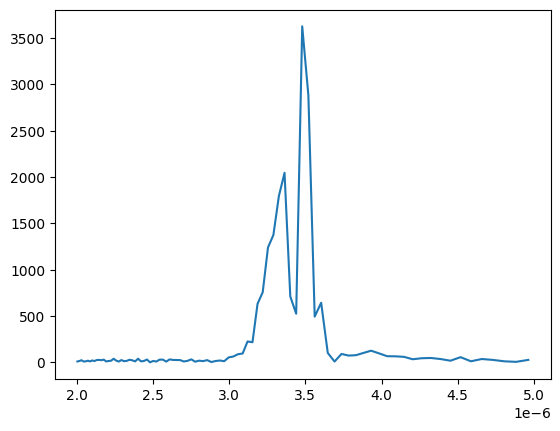

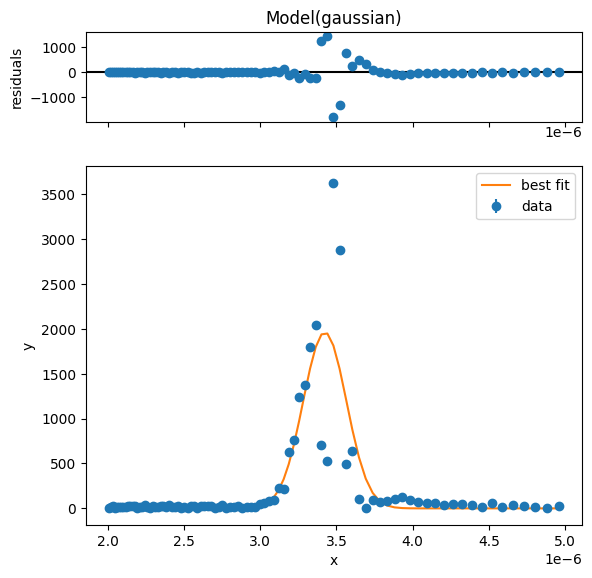

In [10]:
von,bis = f.pos(dat_sorted[0],0.2e-5),f.pos(dat_sorted[0],0.5e-5)

plt.plot(dat_sorted[0,von:bis],dat_sorted[1,von:bis])

fillerr = np.full(len(dat_sorted[0,von:bis]),1)

res = f.gausfit(dat_sorted[1,von:bis],dat_sorted[0,von:bis],fillerr)

res.plot()

print(res.fit_report())